Enunciado
Tenemos que enviar cajas de cervezas de dos cervecerías a cinco bares de acuerdo al siguiente gráfico:

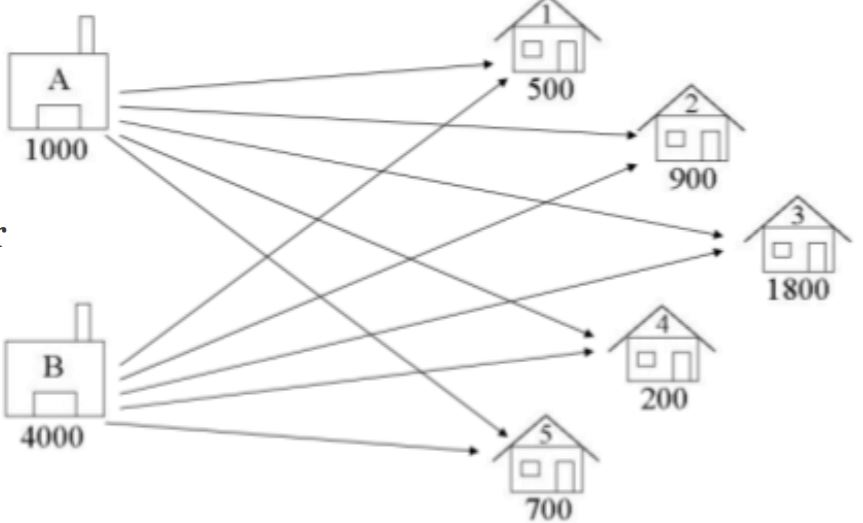

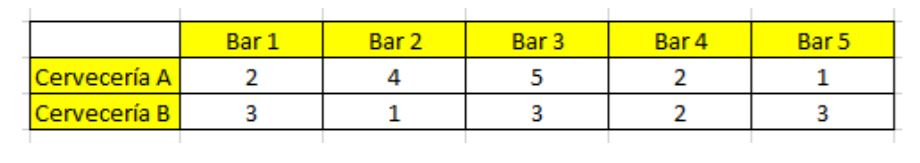

In [4]:
### Bibliotecas 
# instalar pulp: pip install pulp
import pandas as np
from pulp import *
from pandas import DataFrame

In [5]:
### Ciudades
origen = ['cerveceria a','cerveceria b']
destino = ['bar1','bar2','bar3','bar4','bar5']

In [6]:
oferta = {'cerveceria a': 1000, 'cerveceria b' : 4000}
demanda = {'bar1': 500, 'bar2' : 900, 'bar3' : 1800, 'bar4' : 200, 'bar5' : 700}

In [7]:
costo_envio ={'cerveceria a':{'bar1': 2, 'bar2' : 4, 'bar3' : 5, 'bar4' : 2, 'bar5' : 1},
             'cerveceria b':{'bar1': 3, 'bar2' : 1, 'bar3' : 3, 'bar4' : 2, 'bar5' : 3}}

In [8]:
prob = LpProblem('Transporte', LpMinimize)
rutas = [(i,j) for i in origen for j in destino]
cantidad = LpVariable.dicts('Cantidad de Envio',(origen,destino),0)
prob += lpSum(cantidad[i][j]*costo_envio[i][j] for (i,j) in rutas)
for j in destino:
    prob += lpSum(cantidad[i][j] for i in origen) == demanda[j]
for i in origen:
    prob += lpSum(cantidad[i][j] for j in destino) <= oferta[i]
### Resolvemos e imprimimos el Status, si es Optimo, el problema tiene solución.
prob.solve()
print("Status:", LpStatus[prob.status])
### Imprimimos la solución
for v in prob.variables():
    if v.varValue > 0:
        print(v.name, "=", v.varValue)
print('El costo mínimo es:', value(prob.objective))

Status: Optimal
Cantidad_de_Envio_cerveceria_a_bar1 = 300.0
Cantidad_de_Envio_cerveceria_a_bar5 = 700.0
Cantidad_de_Envio_cerveceria_b_bar1 = 200.0
Cantidad_de_Envio_cerveceria_b_bar2 = 900.0
Cantidad_de_Envio_cerveceria_b_bar3 = 1800.0
Cantidad_de_Envio_cerveceria_b_bar4 = 200.0
El costo mínimo es: 8600.0
